<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=200 height=200 align=left class="saturate" >

<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Introduction to Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2022<br>
<font color=3C99D size=5>
    Homework 4: Practical - Convolutional Neural Networks <br>
<font color=696880 size=4>
    Arian Amani
    
    
____


### Full Name : Bahar Dibaeinia
### Student Number :  99105442
___

# Problem
This assignment uses PyTorch to build and implement a residual CNN for solving a classification problem. Our goal is to classify handwritten digits from 0 to 9 on the MNIST dataset. You can try larger and more fun datasets if you have access to Google Colab. (for example: [facial emotion detection](https://www.kaggle.com/datasets/msambare/fer2013))

* It is highly recommended to run this notebook on Google Colab so that you can utilize its GPU.
* If you need to change the inputs of functions you are implementing, or want to add new cells or functions, feel free to do so.

# Setup

In [4]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms, datasets

from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
###########################################################
##  If you need any other packages, import them below    ##
###########################################################


In [16]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

# Prepare The Data (10 Points)

Write a composed transformation to transform our dataset's PIL images to tensors and normalize them with ```mean: 0.1307``` and ```std: 0.3081```: 

<details>
<summary>Hint</summary>
<br>
<a href="https://pytorch.org/vision/stable/generated/torchvision.transforms.Compose.html">torchvision.transforms.Compose</a>
</details>

In [5]:
###############################################################
##                Compose your transformations               ##
###############################################################
transformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307), (0.3081))
])

Split the downloaded MNIST dataset into two dataloaders ```train``` & ```val```

In [6]:
# Download the MNIST dataset
mnist_data = datasets.MNIST(root='data/', download=True, transform=transformation)

# Number of images in the dataset: 60,000
print(len(mnist_data))

# Split the dataset into training and validation sets
train_data, valid_data = random_split(mnist_data, [50000, 10000]) 

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

60000


Create dataloaders for your train and validation data with ```batch size 16``` and ```shuffle = True``` for train loader.

<details>
<summary>Hint</summary>
<br>
<a href="https://pytorch.org/tutorials/beginner/basics/data_tutorial.html">DATASETS & DATALOADERS</a>
</details>

In [7]:
###############################################################
##           Load the datasets into train/valid              ##
##                       dataloaders                         ##
###############################################################
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
val_loader = DataLoader(valid_data)

# Define Model (40 Points)

### You need to implement a model with the architecture below:
[Input: (BS, 1, 28, 28)] -- > [Conv2D (BS, 16, 28, 28)] --> ReLU --> [MaxPool2D (BS, 16, 14, 14): Residual1]

--> [Conv2D (BS, 16, 14, 14)] --> ReLU --> [Conv2D (BS, 16, 14, 14)] --> ReLU --> [Addition with Residual1]

--> [MaxPool2D (BS, 16, 7, 7)] --> [Conv2D (BS, 64, 7, 7)] --> [ReLU: Residual2]

--> [Conv2D (BS, 64, 7, 7)] --> ReLU --> [Conv2D (BS, 64, 7, 7)] --> ReLU --> [Addition with Residual2]

--> [GlobalAveragePooling (BS, 64, 1, 1)] --> [Flatten (BS, 64)] --> [Linear (BS, 10)] --> ReLU --> OUT

Here you can see the drawn schematic of the architecture, too: [Link](https://drive.google.com/file/d/1gQzafyxTkuvQr8T-xUncLmedX94LnY_l/view?usp=share_link)

<details>
<summary>Hint</summary>
<br>
These might be helpful:
<br>
<a href="https://pytorch.org/docs/stable/generated/torch.clone.html">TORCH.CLONE</a>
<br><br>
<a href="https://pytorch.org/docs/master/generated/torch.nn.AdaptiveAvgPool2d.html#torch.nn.AdaptiveAvgPool2d">AdaptiveAvgPool2d</a> with output size (1, 1) for global average pooling
<br><br>
<a href="https://arxiv.org/pdf/1512.03385.pdf">Deep Residual Learning for Image Recognition</a>
</details>

In [66]:
#####################################
##        Define your model        ##
##            Your Code            ##
#####################################
class ResidualClassifier(nn.Module):
  def __init__(self):
        super(ResidualClassifier, self).__init__()
        self.res1 = nn.Sequential(
                        nn.Conv2d(1, 16, kernel_size = 3, stride = 1, padding = 1),
                        nn.ReLU(),
                        nn.MaxPool2d(kernel_size = 2, stride = 2))
        self.add_res1 = nn.Sequential(
                        nn.Conv2d(16, 16, kernel_size = 3, stride = 1, padding = 1),
                        nn.ReLU(),
                        nn.Conv2d(16, 16, kernel_size = 3, stride = 1, padding = 1),
                        nn.ReLU())
        self.res2 = nn.Sequential(
                        nn.MaxPool2d(kernel_size = 2, stride = 2),
                        nn.Conv2d(16, 64, kernel_size = 3, stride = 1, padding = 1),
                        nn.ReLU())
        self.add_res2 = nn.Sequential(
                        nn.Conv2d(64, 64, kernel_size = 3, stride = 1, padding = 1),
                        nn.ReLU(),
                        nn.Conv2d(64, 64, kernel_size = 3, stride = 1, padding = 1),
                        nn.ReLU())
        
        self.gap = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(64, 10)
        
            
        
  def forward(self, x):
        o = self.res1(x)
        o1 = torch.clone(o)
        o = self.add_res1(o)
        o = o1 + o
        o = self.res2(o)
        o2 = torch.clone(o)
        o = self.add_res2(o)
        o = o2 + o
        o = self.gap(o)
        o = nn.Flatten()(o)
        out = self.fc(o)
        return out

# Train Model (30 Points)

In [67]:
######################################################################
##        Instantiate model, define hyper parameters, optimizer,    ##
##        loss function and etc                                     ##
######################################################################
model = ResidualClassifier().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=3e-4, weight_decay = 0.01, momentum = 0.9)

In [68]:
######################################################################
##        Train your model (Complete the code below)                ##
######################################################################

total_step = len(train_loader)
num_epochs = 20

def train(model, trainloader, optimizer, criterion):
    model.train()
    print('Training')
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    for i, data in tqdm(enumerate(trainloader), total=len(trainloader)):
        counter += 1
        image, labels = data
        image = image.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        # forward pass
        outputs = model(image)
        # calculate the loss
        loss = criterion(outputs, labels)
        train_running_loss += loss.item()
        # calculate the accuracy
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == labels).sum().item()
        # backpropagation
        loss.backward()
        # update the optimizer parameters
        optimizer.step()
    
    #sc.step()
    
    # loss and accuracy for the complete epoch
    epoch_loss = train_running_loss / counter
    epoch_acc = 100. * (train_running_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc

def validate(model, testloader, criterion):
    model.eval()
    print('Validation')
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0
    all_labels=[]
    all_preds=[]
    with torch.no_grad():
        for i, data in tqdm(enumerate(testloader), total=len(testloader)):
            counter += 1
            
            image, labels = data
            image = image.to(device)
            labels = labels.to(device)
            # forward pass
            outputs = model(image)
            # calculate the loss
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            # calculate the accuracy
            _, preds = torch.max(outputs.data, 1)
            all_preds += preds
            all_labels+=labels
            valid_running_correct += (preds == labels).sum().item()
        
    # loss and accuracy for the complete epoch
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100. * (valid_running_correct / len(testloader.dataset))
    
    

    return epoch_loss, epoch_acc, torch.tensor(all_preds), torch.tensor(all_labels)
    


In [69]:
train_loss, valid_loss = [], []
train_acc, valid_acc = [], []
model = model.to(device)

# start the training
best_acc=0
for epoch in range(num_epochs):
    print(f"[INFO]: Epoch {epoch+1} of {num_epochs}")

    train_epoch_loss, train_epoch_acc = train(model, train_loader, 
                                            optimizer, criterion)
    valid_epoch_loss, valid_epoch_acc, p, l = validate(model, val_loader,  
                                                criterion)
    
    train_loss.append(train_epoch_loss)
    valid_loss.append(valid_epoch_loss)
    train_acc.append(train_epoch_acc)
    valid_acc.append(valid_epoch_acc)
    

   
    print(f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}")
    print(f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f} ")
   

# save the loss and accuracy plots
#save_plots(train_acc, valid_acc, train_loss, valid_loss)
print('TRAINING COMPLETE')

[INFO]: Epoch 1 of 20
Training


100%|██████████| 3125/3125 [00:51<00:00, 60.85it/s]


Validation


100%|██████████| 10000/10000 [00:17<00:00, 564.26it/s]


Training loss: 2.273, training acc: 15.446
Validation loss: 2.234, validation acc: 22.070 
[INFO]: Epoch 2 of 20
Training


100%|██████████| 3125/3125 [00:51<00:00, 61.20it/s]


Validation


100%|██████████| 10000/10000 [00:17<00:00, 563.20it/s]


Training loss: 1.865, training acc: 34.806
Validation loss: 1.381, validation acc: 44.850 
[INFO]: Epoch 3 of 20
Training


100%|██████████| 3125/3125 [00:50<00:00, 61.86it/s]


Validation


100%|██████████| 10000/10000 [00:17<00:00, 562.09it/s]


Training loss: 0.782, training acc: 74.720
Validation loss: 0.381, validation acc: 88.560 
[INFO]: Epoch 4 of 20
Training


100%|██████████| 3125/3125 [00:50<00:00, 62.06it/s]


Validation


100%|██████████| 10000/10000 [00:18<00:00, 548.97it/s]


Training loss: 0.335, training acc: 89.672
Validation loss: 0.278, validation acc: 91.660 
[INFO]: Epoch 5 of 20
Training


100%|██████████| 3125/3125 [00:50<00:00, 61.80it/s]


Validation


100%|██████████| 10000/10000 [00:17<00:00, 558.15it/s]


Training loss: 0.264, training acc: 91.896
Validation loss: 0.216, validation acc: 93.390 
[INFO]: Epoch 6 of 20
Training


100%|██████████| 3125/3125 [00:51<00:00, 61.08it/s]


Validation


100%|██████████| 10000/10000 [00:17<00:00, 568.25it/s]


Training loss: 0.232, training acc: 92.998
Validation loss: 0.214, validation acc: 93.300 
[INFO]: Epoch 7 of 20
Training


100%|██████████| 3125/3125 [00:51<00:00, 61.17it/s]


Validation


100%|██████████| 10000/10000 [00:17<00:00, 570.84it/s]


Training loss: 0.210, training acc: 93.622
Validation loss: 0.185, validation acc: 94.390 
[INFO]: Epoch 8 of 20
Training


100%|██████████| 3125/3125 [00:50<00:00, 61.92it/s]


Validation


100%|██████████| 10000/10000 [00:17<00:00, 560.36it/s]


Training loss: 0.196, training acc: 94.024
Validation loss: 0.185, validation acc: 94.320 
[INFO]: Epoch 9 of 20
Training


100%|██████████| 3125/3125 [00:50<00:00, 61.76it/s]


Validation


100%|██████████| 10000/10000 [00:18<00:00, 540.28it/s]


Training loss: 0.187, training acc: 94.324
Validation loss: 0.197, validation acc: 94.340 
[INFO]: Epoch 10 of 20
Training


100%|██████████| 3125/3125 [00:50<00:00, 61.44it/s]


Validation


100%|██████████| 10000/10000 [00:17<00:00, 557.91it/s]


Training loss: 0.178, training acc: 94.490
Validation loss: 0.151, validation acc: 95.490 
[INFO]: Epoch 11 of 20
Training


100%|██████████| 3125/3125 [00:50<00:00, 61.53it/s]


Validation


100%|██████████| 10000/10000 [00:17<00:00, 561.05it/s]


Training loss: 0.170, training acc: 94.856
Validation loss: 0.150, validation acc: 95.450 
[INFO]: Epoch 12 of 20
Training


100%|██████████| 3125/3125 [00:51<00:00, 60.36it/s]


Validation


100%|██████████| 10000/10000 [00:17<00:00, 561.28it/s]


Training loss: 0.167, training acc: 94.836
Validation loss: 0.153, validation acc: 95.490 
[INFO]: Epoch 13 of 20
Training


100%|██████████| 3125/3125 [00:51<00:00, 60.90it/s]


Validation


100%|██████████| 10000/10000 [00:17<00:00, 564.97it/s]


Training loss: 0.162, training acc: 95.030
Validation loss: 0.153, validation acc: 95.530 
[INFO]: Epoch 14 of 20
Training


100%|██████████| 3125/3125 [00:50<00:00, 62.08it/s]


Validation


100%|██████████| 10000/10000 [00:18<00:00, 544.81it/s]


Training loss: 0.155, training acc: 95.276
Validation loss: 0.151, validation acc: 95.580 
[INFO]: Epoch 15 of 20
Training


100%|██████████| 3125/3125 [00:50<00:00, 61.81it/s]


Validation


100%|██████████| 10000/10000 [00:17<00:00, 570.45it/s]


Training loss: 0.155, training acc: 95.276
Validation loss: 0.147, validation acc: 95.430 
[INFO]: Epoch 16 of 20
Training


100%|██████████| 3125/3125 [00:50<00:00, 62.03it/s]


Validation


100%|██████████| 10000/10000 [00:17<00:00, 562.17it/s]


Training loss: 0.149, training acc: 95.438
Validation loss: 0.193, validation acc: 94.290 
[INFO]: Epoch 17 of 20
Training


100%|██████████| 3125/3125 [00:51<00:00, 60.88it/s]


Validation


100%|██████████| 10000/10000 [00:17<00:00, 561.18it/s]


Training loss: 0.149, training acc: 95.436
Validation loss: 0.156, validation acc: 95.320 
[INFO]: Epoch 18 of 20
Training


100%|██████████| 3125/3125 [00:50<00:00, 61.83it/s]


Validation


100%|██████████| 10000/10000 [00:17<00:00, 567.53it/s]


Training loss: 0.147, training acc: 95.450
Validation loss: 0.186, validation acc: 94.080 
[INFO]: Epoch 19 of 20
Training


100%|██████████| 3125/3125 [00:50<00:00, 61.60it/s]


Validation


100%|██████████| 10000/10000 [00:18<00:00, 548.86it/s]


Training loss: 0.144, training acc: 95.572
Validation loss: 0.134, validation acc: 95.960 
[INFO]: Epoch 20 of 20
Training


100%|██████████| 3125/3125 [00:50<00:00, 62.06it/s]


Validation


100%|██████████| 10000/10000 [00:17<00:00, 570.95it/s]


Training loss: 0.144, training acc: 95.606
Validation loss: 0.139, validation acc: 95.800 
TRAINING COMPLETE


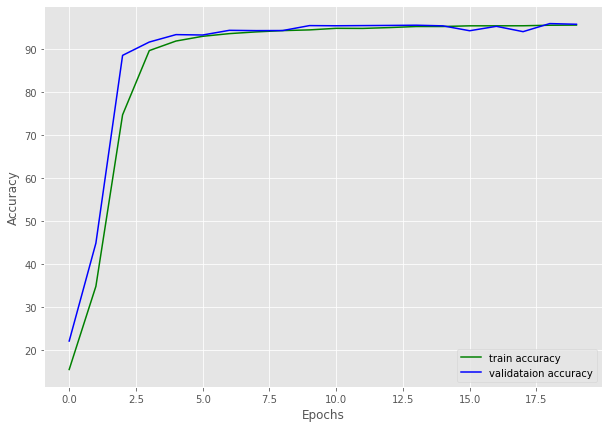

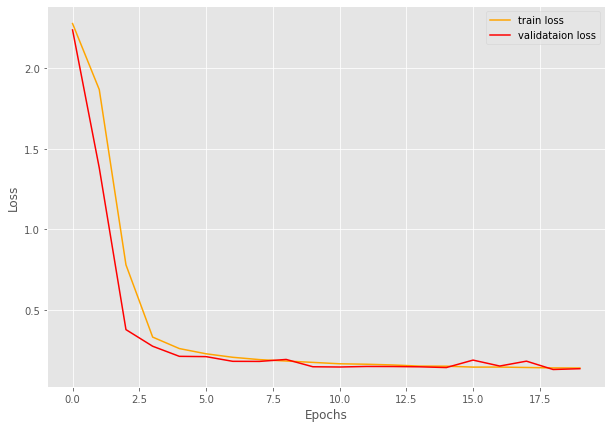

In [70]:
##############################################################
##          Plot metrics graph for different epochs         ##
##                        Your Code                         ##
##############################################################
plt.figure(figsize=(10, 7))
plt.plot(
        train_acc, color='green', linestyle='-', 
        label='train accuracy'
    )
plt.plot(
        valid_acc, color='blue', linestyle='-', 
        label='validataion accuracy'
    )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

    # loss plots
plt.figure(figsize=(10, 7))
plt.plot(
        train_loss, color='orange', linestyle='-', 
        label='train loss'
    )
plt.plot(
        valid_loss, color='red', linestyle='-', 
        label='validataion loss'
    )
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()




# Test Model (20 Points)

10000
Validation


100%|██████████| 157/157 [00:02<00:00, 76.29it/s]


loss: 0.11783678366529761
acc: 96.27
confusion matrix: [[ 964    0    3    0    0    0    4    1    8    0]
 [   2 1121    4    0    1    0    4    0    3    0]
 [   5    0 1011    1    0    0    1    2   10    2]
 [   0    0   19  963    0    1    0    5   19    3]
 [   0    3    1    0  938    0   14    3    3   20]
 [   1    2    4   15    0  821    0    1   42    6]
 [  14    5    3    0    4    1  918    0   13    0]
 [   2    1   14    7    0    0    0  991    5    8]
 [   3    0    2    1    1    1    2    3  959    2]
 [   6    3    6    8    4    3    0   12   26  941]]


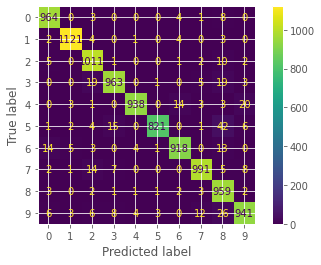

In [71]:
##################################################
##          Test your model on test-set         ##
##          and plot confusion matrix           ##
##################################################
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
test_data = datasets.MNIST(root='data/', download=True, transform=transformation, train=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)
print(len(test_data))



test_epoch_loss, test_epoch_acc, p, l = validate(model, test_loader,  
                                                criterion)

mat=confusion_matrix(l,p)
print('loss:',test_epoch_loss)
print('acc:',test_epoch_acc)
print('confusion matrix:',mat)

disp=ConfusionMatrixDisplay(mat)
disp.plot()
plt.show()